In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders_df = pd.read_csv('./data/Orders.csv')
returns_df = pd.read_csv('./data/Returns.csv')

In [3]:
orders_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
returns_df.columns = ['Returned','Order.ID','Region']
returns_df.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [5]:
orders_df.loc[orders_df['Order.ID']=="CA-2014-AB10015140-41954"]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.0,$54.71,25.27,High


In [6]:
orders_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [7]:
orders_df['Profit'] = orders_df['Profit'].map(lambda x: str(x).replace("$",'').replace(",",'')).astype('float')
orders_df['Sales'] = orders_df['Sales'].map(lambda x: str(x).replace("$",'').replace(",",'')).astype('float')

In [8]:
orders_df[['Profit','Sales']].head()

,Profit,Sales
0,62.15,221.98
1,-288.77,3709.40
2,919.97,5175.17
3,-96.54,2892.51
4,311.52,2832.96


In [9]:
print(orders_df.Profit.dtype)
print(orders_df.Sales.dtype)

float64
float64


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

### Problem 2.1

In [10]:
orders_df['Order.Date'] = pd.to_datetime(orders_df['Order.Date'], format="%m/%d/%y")
orders_df['Ship.Date'] = pd.to_datetime(orders_df['Ship.Date'], format="%m/%d/%y")

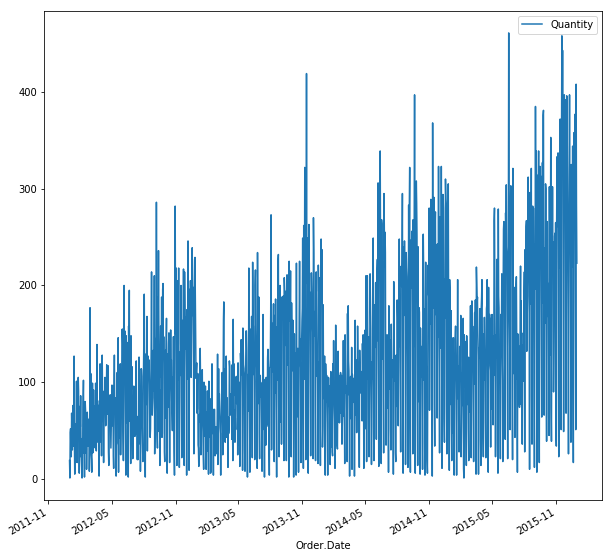

In [11]:
orders_df[['Order.Date','Quantity']].groupby('Order.Date').sum().plot(figsize=(10,10))
plt.show()

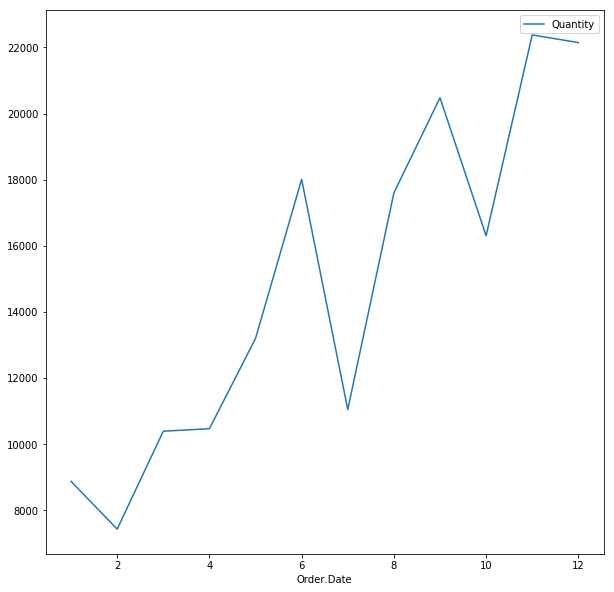

In [12]:
# Grouped by month sum totals of sales
orders_df[['Order.Date','Quantity']].set_index('Order.Date').groupby(orders_df[['Order.Date','Quantity']].set_index('Order.Date').index.month).sum().plot(figsize=(10,10))
plt.show()


### Problem 2.2

In [13]:
orders_df['order_month'] = orders_df['Order.Date'].dt.month

In [14]:
df_group_catANDmonth = orders_df[['Category','order_month','Quantity']].groupby(['Category','order_month']).sum().reset_index()

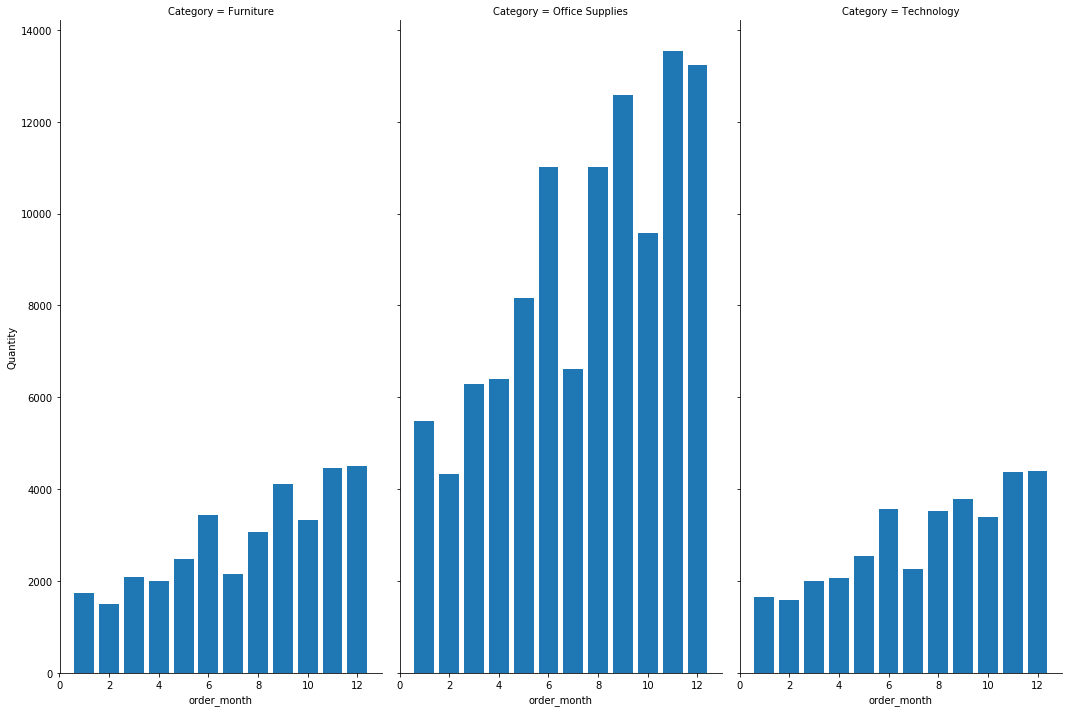

In [15]:
grid = sns.FacetGrid(df_group_catANDmonth, col="Category", height=10, aspect=.5)
grid.map(plt.bar, "order_month","Quantity")

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?

	2. How many customer returned more than once? more than 5 times?

	3. Which regions are more likely to return orders?

	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

### Problem 3.1

In [16]:
returned_orders_df = pd.merge(orders_df,returns_df[['Order.ID','Returned']],how='left', on=['Order.ID'])
returned_orders_df['Returned'].fillna("No", inplace = True)

In [17]:
returned_orders_df.Returned = returned_orders_df.Returned.map({'Yes':1,'No':0})

In [18]:
returned_orders_df[['Returned','Profit']].groupby(['Returned']).sum().loc[1,:]

Profit    61370.75
Name: 1, dtype: float64

### Problem 3.2

### Greater than 1

In [19]:
a = returned_orders_df[['Customer.ID','Returned']].groupby('Customer.ID').sum().sort_values(by='Returned',ascending=False)
a[a['Returned']>1].count() #547

Returned    547
dtype: int64

### Greater than 5

In [20]:
a = returned_orders_df[['Customer.ID','Returned']].groupby('Customer.ID').sum().sort_values(by='Returned',ascending=False)
a[a["Returned"] >5].count() #46

Returned    46
dtype: int64

### Problem 3.3

In [21]:
returned_orders_df[['Region','Returned']].groupby('Region').sum().sort_values(by='Returned',ascending=False)

,Returned
Region,
Central America,248
Western Europe,233
Western US,177
Oceania,154
Southeastern Asia,140
Eastern US,134
South America,133
Eastern Asia,131
Southern Europe,112


### Problem 3.4

In [22]:
returned_orders_df[['Sub.Category','Returned']].groupby('Sub.Category').sum().sort_values(by='Returned', ascending=False)

,Returned
Sub.Category,
Binders,269
Art,217
Storage,212
Paper,150
Chairs,147
Phones,145
Accessories,138
Labels,137
Furnishings,135


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.



### Problem 4: Feature Engineering


#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”




In [23]:
returned_orders_df['Returned'].value_counts()

0    49070
1     2220
Name: Returned, dtype: int64

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date




In [24]:
# Create timedelta column
returned_orders_df['Process.Time'] = returned_orders_df['Ship.Date'] - returned_orders_df['Order.Date']

In [25]:
# Make datetime into integer
returned_orders_df['Process.Time'] = returned_orders_df['Process.Time'].map(lambda x: int(str(x).replace(" days",'')[0]))

#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID




In [26]:
return_counts = returned_orders_df[['Product.ID','Returned']].groupby('Product.ID').sum()
return_counts.columns = ['num_returned']
returned_orders_df = pd.merge(returned_orders_df, return_counts, how='left',on=['Product.ID'])

### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
colums_without_ID = ['Ship.Mode','Segment',
       'Region', 'Market','Sub.Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority',
       'Process.Time', 'num_returned']

rod_copy = returned_orders_df.loc[:,colums_without_ID]

In [29]:
shipM = pd.get_dummies(rod_copy['Ship.Mode'],drop_first=True, prefix='Ship.Mode', prefix_sep='__')
rod_copy = pd.concat([rod_copy.drop('Ship.Mode',axis=1),shipM],sort=True,axis=1)

segment = pd.get_dummies(rod_copy['Segment'],drop_first=True, prefix='Segment', prefix_sep='__')
rod_copy = pd.concat([rod_copy.drop('Segment',axis=1),segment],sort=True,axis=1)

market = pd.get_dummies(rod_copy['Market'],drop_first=True, prefix='Market', prefix_sep='__')
rod_copy = pd.concat([rod_copy.drop('Market',axis=1),market],sort=True,axis=1)

region = pd.get_dummies(rod_copy['Region'],drop_first=True, prefix='Region', prefix_sep='__')
rod_copy = pd.concat([rod_copy.drop('Region',axis=1),market],sort=True,axis=1)

subCat = pd.get_dummies(rod_copy['Sub.Category'],drop_first=True, prefix='Sub.Category', prefix_sep='__')
rod_copy = pd.concat([rod_copy.drop('Sub.Category',axis=1),subCat],sort=True,axis=1)

order = pd.get_dummies(rod_copy['Order.Priority'],drop_first=True, prefix='Order.Priority', prefix_sep='__')
rod_copy = pd.concat([rod_copy.drop('Order.Priority',axis=1),order],sort=True,axis=1)

In [30]:
X = rod_copy.loc[:]
y = returned_orders_df.loc[:,'Returned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y ,random_state=42)

In [31]:
del rod_copy

In [32]:
from sklearn import discriminant_analysis
QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.



In [33]:
QDA.score(X_test, y_test)

0.9025151101579255

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.